<a href="https://colab.research.google.com/github/AnweshaG-29/Business-Valuation-Analysis/blob/main/BAV_TVS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
warnings.filterwarnings("ignore")

In [ ]:
ticker = "TVSMOTOR.NS"
stock = yf.Ticker(ticker)

In [ ]:
#Downloading the last three years fiscal ending Balance sheet and Income statement for the company
balance_sheet = stock.balance_sheet.T
income_statement = stock.financials.T
balance_sheet = balance_sheet.iloc[:3]
income_statement = income_statement.iloc[:3]
balance_sheet = balance_sheet[::-1]
income_statement = income_statement[::-1]
balance_sheet

,Treasury Shares Number,Ordinary Shares Number,Share Issued,Net Debt,Total Debt,Tangible Book Value,Invested Capital,Working Capital,Net Tangible Assets,Capital Lease Obligations,...,Other Receivables,Taxes Receivable,Accounts Receivable,Allowance For Doubtful Accounts Receivable,Gross Accounts Receivable,Cash Cash Equivalents And Short Term Investments,Other Short Term Investments,Cash And Cash Equivalents,Cash Equivalents,Cash Financial
2022-03-31,NaN,475087114.0,475087114.0,138516000000.0,158272100000.0,27091400000.0,196967300000.0,-10186700000.0,27091400000.0,5299300000.0,...,75400300000.0,5719300000.0,11773000000.0,-526300000.0,12299300000.0,15933000000.0,1476200000.0,14456800000.0,0.0,14456800000.0
2023-03-31,NaN,475087114.0,475087114.0,197750400000.0,223755800000.0,36444300000.0,271312300000.0,-21944200000.0,36444300000.0,7493500000.0,...,108040800000.0,5091700000.0,12564200000.0,-494900000.0,13059100000.0,20636600000.0,2124700000.0,18511900000.0,0.0,18511900000.0
2024-03-31,0.0,475087114.0,475087114.0,229308200000.0,260057000000.0,46295700000.0,320701300000.0,4418000000.0,46295700000.0,7190800000.0,...,137194000000.0,5473500000.0,18394200000.0,-483400000.0,18877600000.0,25459900000.0,1901900000.0,23558000000.0,2500000000.0,21058000000.0


In [ ]:
income_statement

,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,...,Depreciation And Amortization In Income Statement,Amortization,Depreciation Income Statement,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
2022-03-31,-117827803.035274,0.314879,27298800000.0,-374200000.0,-374200000.0,7568200000.0,7428600000.0,163169900000.0,26924600000.0,19496000000.0,...,7428600000.0,1147100000.0,6281500000.0,11158900000.0,10768200000.0,390700000.0,50038000000.0,163169900000.0,213207900000.0,213207900000.0
2023-03-31,350109980.73377,0.323637,40425600000.0,1081800000.0,1081800000.0,13286700000.0,8588600000.0,209056600000.0,41507400000.0,32918800000.0,...,8588600000.0,1977200000.0,6611400000.0,13360700000.0,12937000000.0,423700000.0,65280200000.0,209056600000.0,274336800000.0,274336800000.0
2024-03-31,225441853.994939,0.341993,55287500000.0,659200000.0,659200000.0,16863700000.0,9751200000.0,244646000000.0,55946700000.0,46195500000.0,...,9751200000.0,2217200000.0,7534000000.0,18111100000.0,17585200000.0,525900000.0,85697800000.0,244646000000.0,330343800000.0,330343800000.0


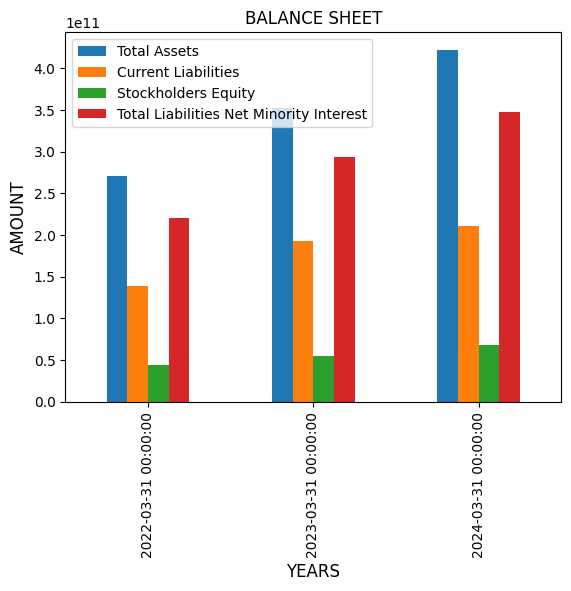

In [ ]:
#Plotting variables from balance sheet
balance_sheet[["Total Assets", "Current Liabilities", "Stockholders Equity", "Total Liabilities Net Minority Interest"]].plot(kind="bar")
plt.title("BALANCE SHEET")
plt.xlabel("YEARS", fontsize=12)
plt.ylabel("AMOUNT", fontsize=12)
plt.show()

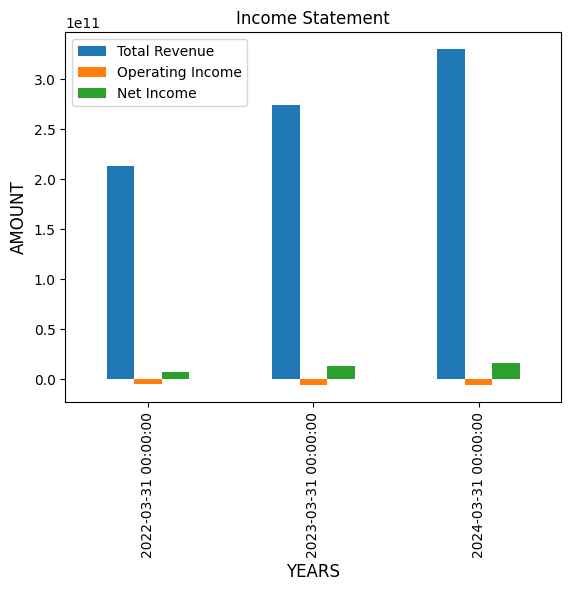

In [ ]:
income_statement[["Total Revenue", "Operating Income", "Net Income"]].plot(kind="bar")
plt.title("Income Statement")
plt.xlabel("YEARS", fontsize=12)
plt.ylabel("AMOUNT", fontsize=12)
plt.show()

In [ ]:
cashflow_statement = stock.cashflow.T
cashflow_statement = cashflow_statement[::-1]
cashflow_statement

,Free Cash Flow,Issuance Of Debt,Capital Expenditure,End Cash Position,Beginning Cash Position,Changes In Cash,Financing Cash Flow,Net Other Financing Charges,Interest Paid Cff,Cash Dividends Paid,...,Change In Receivables,Other Non Cash Items,Provisionand Write Offof Assets,Depreciation And Amortization,Amortization Cash Flow,Depreciation,Gain Loss On Investment Securities,Net Foreign Currency Exchange Gain Loss,Gain Loss On Sale Of PPE,Net Income From Continuing Operations
2020-03-31,NaN,5126900000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-31,2233100000.0,NaN,-9279800000.0,15737600000.0,10413400000.0,5324200000.0,2635000000.0,-552100000.0,-1267500000.0,-997700000.0,...,-13019500000.0,1191700000.0,265600000.0,5648200000.0,NaN,5648200000.0,-2400000.0,177000000.0,19600000.0,8216300000.0
2022-03-31,-25450200000.0,33533400000.0,-9698300000.0,14456800000.0,15737600000.0,-1280800000.0,29180200000.0,-72400000.0,-1557400000.0,-1904000000.0,...,-30021700000.0,1499300000.0,-254900000.0,7428600000.0,NaN,7428600000.0,-40400000.0,-56500000.0,-24700000.0,10667900000.0
2023-03-31,-57455800000.0,65876800000.0,-13407700000.0,18511900000.0,14456800000.0,4055100000.0,61180800000.0,622700000.0,-1120800000.0,-2918100000.0,...,-66260400000.0,1886100000.0,157400000.0,8588600000.0,1977200000.0,6611400000.0,-1074200000.0,6300000.0,-26500000.0,19360300000.0
2024-03-31,-23978400000.0,NaN,-11451700000.0,23558000000.0,18511900000.0,5046100000.0,27586400000.0,-439600000.0,-2836700000.0,-3800700000.0,...,-55152300000.0,2472300000.0,614000000.0,9751200000.0,2217200000.0,7534000000.0,-631900000.0,108200000.0,-33800000.0,27029200000.0


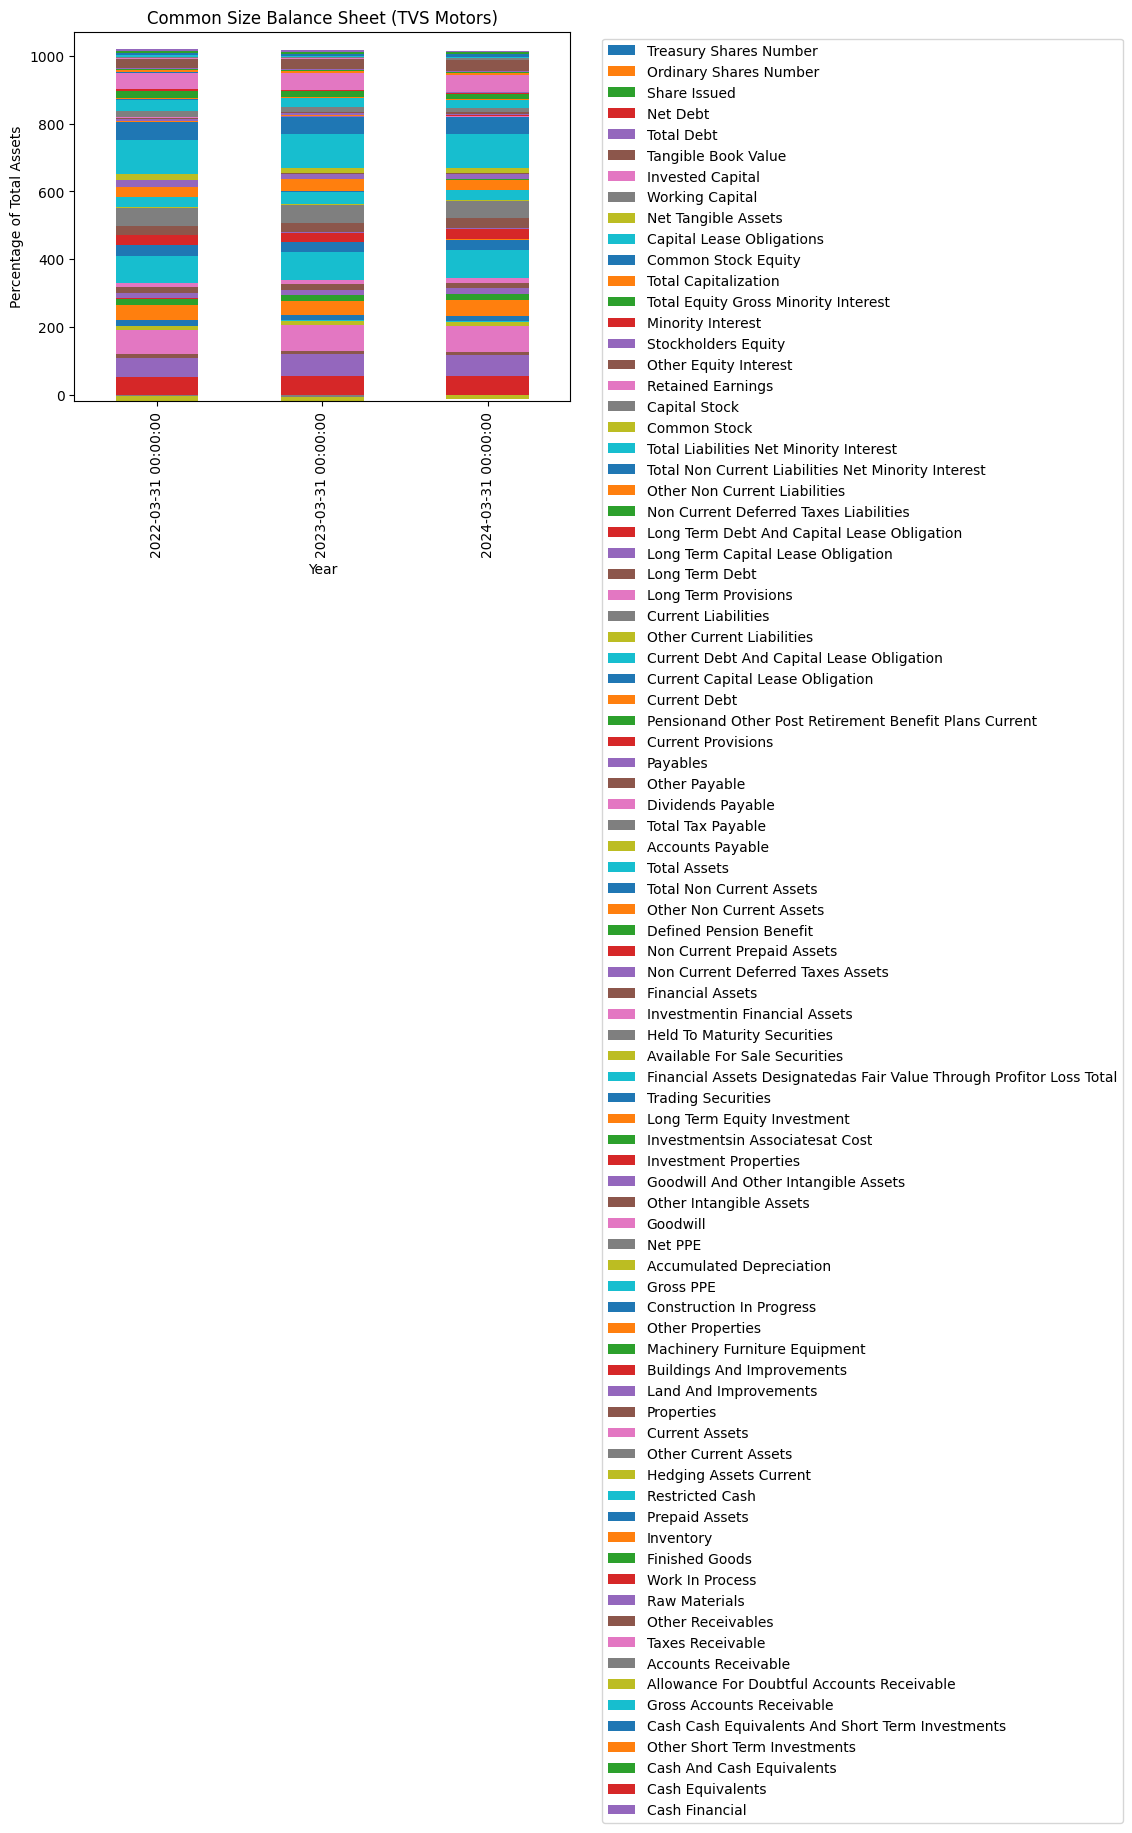

In [ ]:
#common sizing balance sheet

balance_sheet = balance_sheet.apply(lambda x: pd.to_numeric(x, errors='coerce'))
income_statement = income_statement.apply(lambda x: pd.to_numeric(x, errors='coerce'))


def common_sizing(df, column_total):
    return df.div(df[column_total], axis=0) * 100

balance_sheet.fillna(0,inplace=True)
balance_sheet_common_sizing = balance_sheet.div(balance_sheet["Total Assets"], axis=0) * 100


if not balance_sheet_common_sizing.empty:
  fig, ax = plt.subplots()
  balance_sheet_common_sizing.plot(kind="bar", stacked=True, ax=ax, title="Common Size Balance Sheet (TVS Motors)")
  ax.set_xlabel("Year")
  ax.set_ylabel("Percentage of Total Assets")
  ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
  plt.tight_layout()
  plt.show()

else:
    print("balance_sheet_common_sizing is empty, skipping plot.")

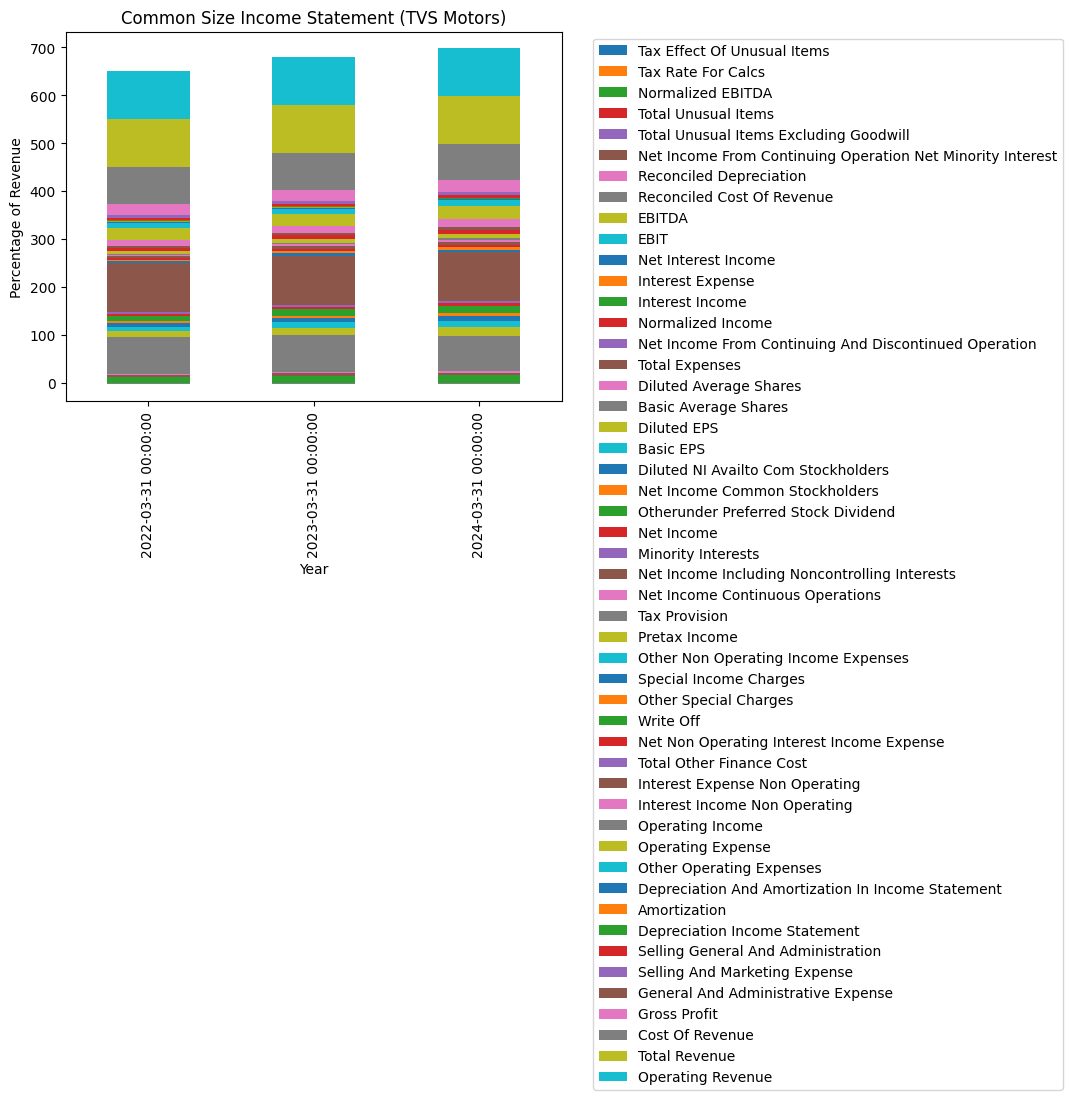

In [ ]:
#common sizing income statement
income_statement.fillna(0,inplace=True)
income_statement_common_sizing = common_sizing(income_statement, "Total Revenue")

fig, ax = plt.subplots()
income_statement_common_sizing.plot(kind="bar", stacked=True, ax=ax, title="Common Size Income Statement (TVS Motors)")
ax.set_xlabel("Year")
ax.set_ylabel("Percentage of Revenue")
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [ ]:
#ratios
ratios = pd.DataFrame(index=balance_sheet.index)
ratios['Current Ratio'] = balance_sheet['Total Assets'] / balance_sheet['Current Liabilities']
ratios['Debt to Equity'] = balance_sheet['Total Debt'] / balance_sheet['Stockholders Equity']
ratios['Gross Margin'] = income_statement['Gross Profit'] / income_statement['Total Revenue']
ratios['Operating Margin'] = income_statement['Operating Income'] / income_statement['Total Revenue']
ratios

,Current Ratio,Debt to Equity,Gross Margin,Operating Margin
2022-03-31,1.950674,3.597543,0.234691,-0.020312
2023-03-31,1.833262,4.064592,0.237956,-0.019939
2024-03-31,2.003038,3.833664,0.259420,-0.016187


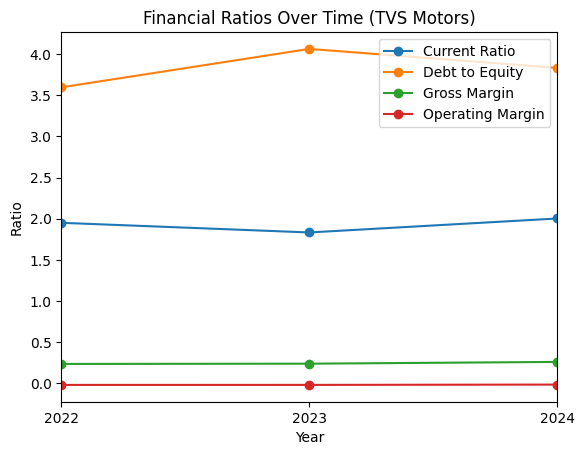

In [ ]:
ratios.plot(title="Financial Ratios Over Time (TVS Motors)", marker='o')
plt.xlabel("Year")
plt.ylabel("Ratio")
plt.show()

In [ ]:
#horizontal analysis
horizontal_analysis = income_statement.pct_change() * 100
horizontal_analysis

,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,...,Depreciation And Amortization In Income Statement,Amortization,Depreciation Income Statement,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
2022-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-31,-397.136984,2.781386,48.085630,-389.096740,-389.096740,75.559578,15.615325,28.122037,54.161622,68.848995,...,15.615325,72.365095,5.251930,19.731336,20.140785,8.446378,30.461249,28.122037,28.671030,28.671030
2024-03-31,-35.608276,5.671787,36.763585,-39.064522,-39.064522,26.921659,13.536548,17.023811,34.787291,40.331665,...,13.536548,12.138378,13.954684,35.555023,35.929505,24.120840,31.276865,17.023811,20.415416,20.415416


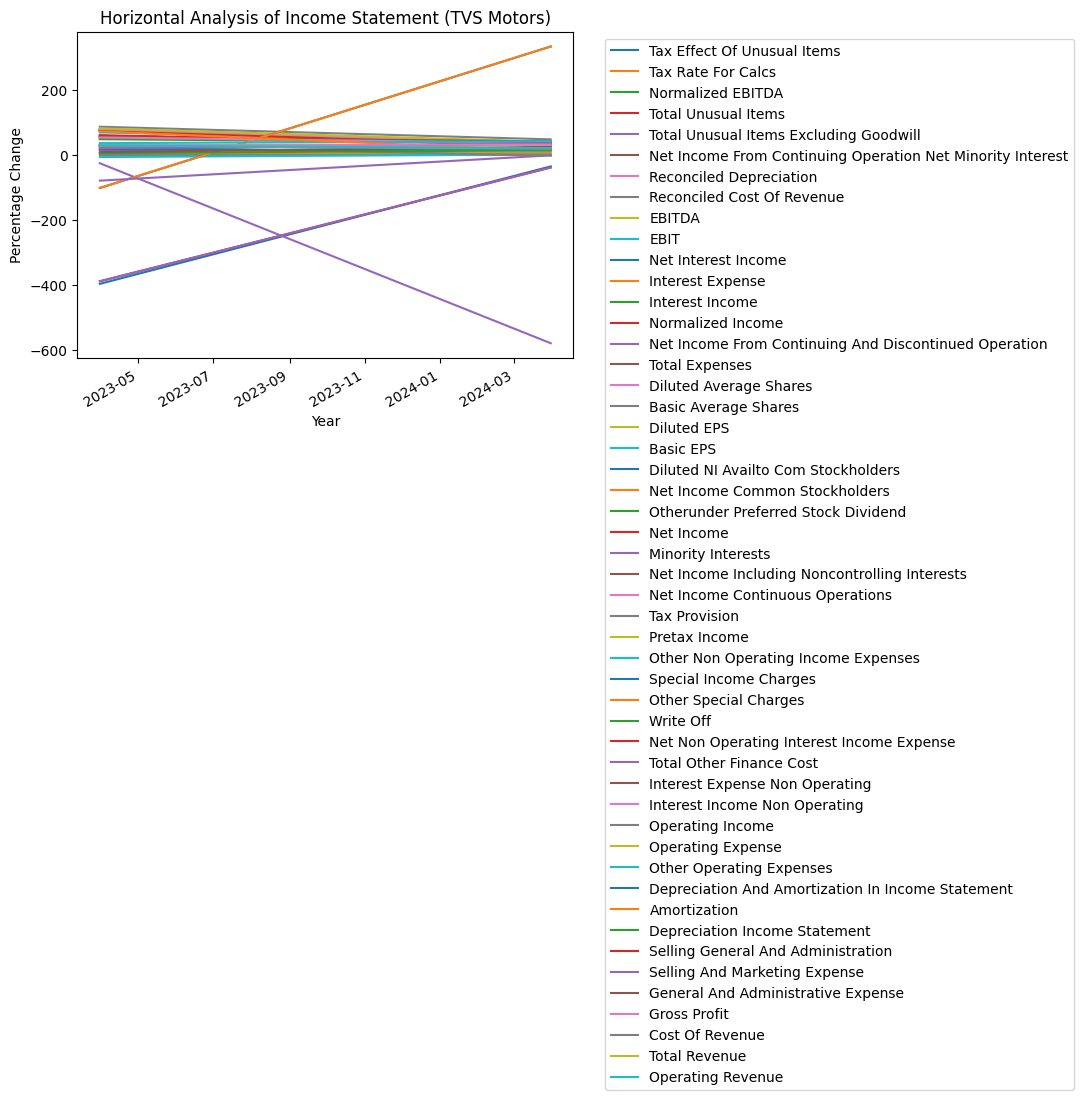

In [ ]:
fig, ax = plt.subplots()
horizontal_analysis.iloc[1:,:].plot(kind='line', ax=ax, title="Horizontal Analysis of Income Statement (TVS Motors)")
ax.set_xlabel("Year")
ax.set_ylabel("Percentage Change")
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

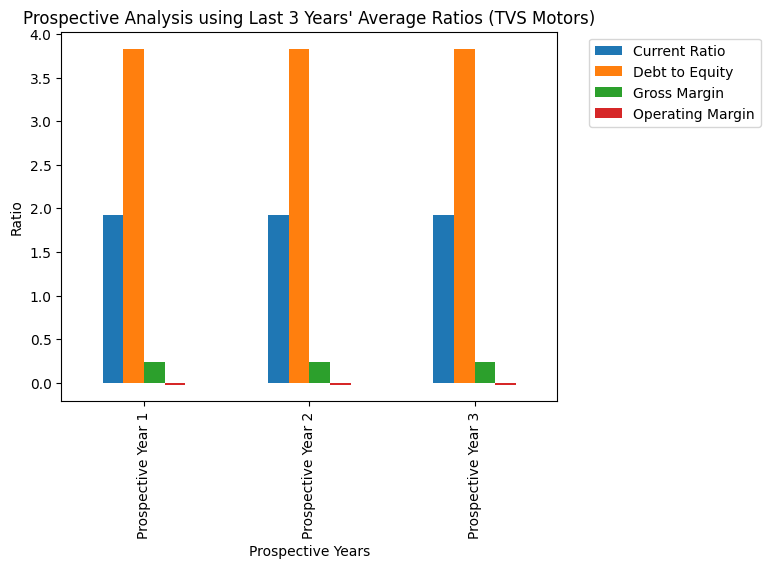

In [ ]:
#prospective analysis
average_ratios = ratios.tail(3).mean()
prospective_analysis = pd.DataFrame({
    'Current Ratio': [average_ratios['Current Ratio']] * 3,
    'Debt to Equity': [average_ratios['Debt to Equity']] * 3,
    'Gross Margin': [average_ratios['Gross Margin']] * 3,
    'Operating Margin': [average_ratios['Operating Margin']] * 3
}, index=["Prospective Year 1", "Prospective Year 2", "Prospective Year 3"])

prospective_analysis.plot(kind='bar', title="Prospective Analysis using Last 3 Years' Average Ratios (TVS Motors)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xlabel("Prospective Years")
plt.ylabel("Ratio")
plt.show()

In [ ]:
#projecting cash flows
tax_rate = 0.25
def cash_flows(income_statement, balance_sheet, cashflow_statement, tax_rate):
    revenue_growth = income_statement["Total Revenue"].pct_change().mean()
    operating_margin = income_statement["Operating Income"].mean() / income_statement["Total Revenue"].mean()
    net_income_margin = income_statement["Net Income"].mean() / income_statement["Total Revenue"].mean()
    capex_to_revenue = cashflow_statement["Purchase Of PPE"].mean() / income_statement["Total Revenue"].mean()

    accumulated_depreciation_current = balance_sheet["Accumulated Depreciation"].iloc[-1]
    accumulated_depreciation_previous = balance_sheet["Accumulated Depreciation"].iloc[-2]
    depreciation_expense = accumulated_depreciation_current - accumulated_depreciation_previous
    depreciation_to_revenue = depreciation_expense / income_statement["Total Revenue"].mean()
    change_in_wc_to_revenue = (balance_sheet["Current Assets"].mean() - balance_sheet["Current Liabilities"].mean()) / income_statement["Total Revenue"].mean()

    projection_data = []
    initial_revenue = income_statement["Total Revenue"].iloc[-1] * (1 + revenue_growth)
    last_revenue = initial_revenue

    for year in range(2024, 2029):
        revenue = last_revenue * (1 + revenue_growth)

        EBIT = revenue * operating_margin
        taxes = EBIT * tax_rate
        capex = revenue * capex_to_revenue
        depreciation = revenue * depreciation_to_revenue
        change_in_wc = revenue * change_in_wc_to_revenue

        # Calculate FCFF
        fcff_value = EBIT - taxes + depreciation - capex - change_in_wc

        # Calculate FCFE
        net_income = revenue * net_income_margin
        change_in_debt = balance_sheet["Total Debt"].iloc[-1] - balance_sheet["Total Debt"].iloc[-2]
        preferred_dividends = 0  # Assuming no preferred dividends
        fcfe_value = net_income - preferred_dividends + change_in_debt

        projection_data.append({
            "Year": year,
            "Revenue": revenue,
            "FCFF": fcff_value,
            "FCFE": fcfe_value
        })

        last_revenue = revenue

    projection_df = pd.DataFrame(projection_data)

    return projection_df


In [ ]:
projection_df = cash_flows(income_statement, balance_sheet, cashflow_statement, tax_rate)
projection_df

,Year,Revenue,FCFF,FCFE
0,2024,5.123967e+11,1.982918e+10,5.993142e+10
1,2025,6.381554e+11,2.469590e+10,6.573104e+10
2,2026,7.947793e+11,3.075708e+10,7.295407e+10
3,2027,9.898438e+11,3.830585e+10,8.194987e+10
4,2028,1.232783e+12,4.770734e+10,9.315352e+10


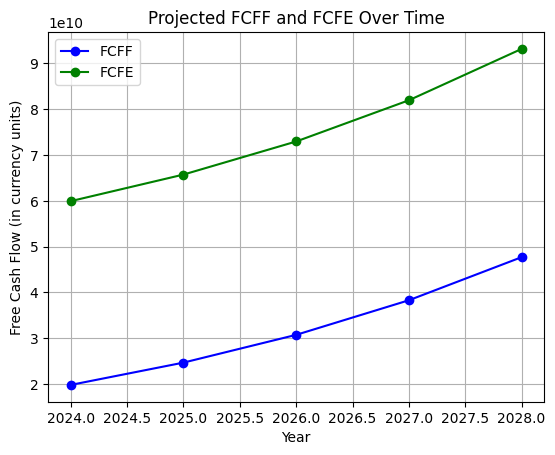

In [ ]:
plt.plot(projection_df["Year"], projection_df["FCFF"], label="FCFF", marker='o', color='b')

plt.plot(projection_df["Year"], projection_df["FCFE"], label="FCFE", marker='o', color='g')

plt.title("Projected FCFF and FCFE Over Time")
plt.xlabel("Year")
plt.ylabel("Free Cash Flow (in currency units)")
plt.legend()

plt.grid()
plt.show()

CALCULATING COST OF EQUITY

In [ ]:
start = '2021-04-06'
end = '2024-04-06'
tvs_df = yf.download(ticker,
                      start=start,
                      end=end,
                      progress=False,interval ='1wk'
)
tvs_df.dropna(inplace=True)
tvs_df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TVSMOTOR.NS,TVSMOTOR.NS,TVSMOTOR.NS,TVSMOTOR.NS,TVSMOTOR.NS,TVSMOTOR.NS
Date,,,,,,
2021-04-05 00:00:00+00:00,559.518433,568.000000,590.500000,557.500000,589.000000,6205739
2021-04-12 00:00:00+00:00,542.821472,551.049988,559.799988,532.150024,559.799988,5286386
2021-04-19 00:00:00+00:00,524.843994,532.799988,547.549988,523.650024,542.200012,5198580
2021-04-26 00:00:00+00:00,621.479126,630.900024,664.000000,530.250000,533.000000,55109677
2021-05-03 00:00:00+00:00,608.919556,618.150024,637.349976,602.599976,618.000000,14324889


In [ ]:
#Download Market index closing prices
nifty_df = yf.download('^NSEI',start=start,
                      end=end,
                      progress=False,interval ='1wk',
)
nifty_df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,,
2021-04-05 00:00:00+00:00,14834.849609,14834.849609,14984.150391,14573.900391,14737.000000,1494200
2021-04-12 00:00:00+00:00,14617.849609,14617.849609,14697.700195,14248.700195,14644.650391,2400500
2021-04-19 00:00:00+00:00,14341.349609,14341.349609,14526.950195,14151.400391,14306.599609,2002400
2021-04-26 00:00:00+00:00,14631.099609,14631.099609,15044.349609,14421.299805,14449.450195,2492900
2021-05-03 00:00:00+00:00,14823.150391,14823.150391,14863.049805,14416.250000,14481.049805,2364000


In [ ]:
#Calculate Log returns
nifty_df['Return_NIFTY'] = np.log(nifty_df['Adj Close']/nifty_df['Adj Close'].shift(1))
print(nifty_df['Return_NIFTY'])

Date
2021-04-05 00:00:00+00:00         NaN
2021-04-12 00:00:00+00:00   -0.014736
2021-04-19 00:00:00+00:00   -0.019096
2021-04-26 00:00:00+00:00    0.020002
2021-05-03 00:00:00+00:00    0.013041
                               ...   
2024-03-04 00:00:00+00:00    0.006906
2024-03-11 00:00:00+00:00   -0.021125
2024-03-18 00:00:00+00:00    0.003327
2024-03-25 00:00:00+00:00    0.010362
2024-04-01 00:00:00+00:00    0.008332
Name: Return_NIFTY, Length: 157, dtype: float64


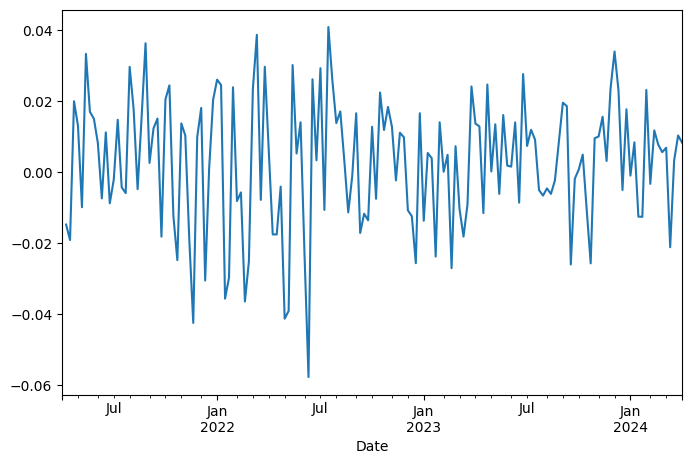

In [ ]:
nifty_df['Return_NIFTY'].plot(figsize=(8,5))
plt.show()

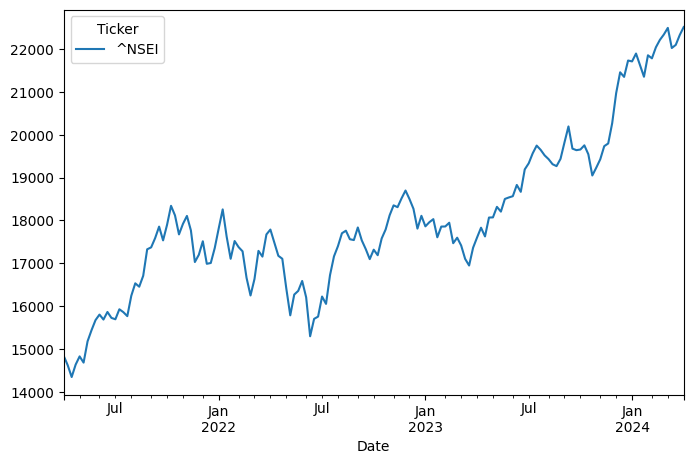

In [ ]:
nifty_df['Adj Close'].plot(figsize=(8,5))
plt.show()

In [ ]:
nifty_df1 = nifty_df.dropna(axis=0)
nifty_df1.head()

Price,Adj Close,Close,High,Low,Open,Volume,Return_NIFTY
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,
Date,,,,,,,
2021-04-12 00:00:00+00:00,14617.849609,14617.849609,14697.700195,14248.700195,14644.650391,2400500,-0.014736
2021-04-19 00:00:00+00:00,14341.349609,14341.349609,14526.950195,14151.400391,14306.599609,2002400,-0.019096
2021-04-26 00:00:00+00:00,14631.099609,14631.099609,15044.349609,14421.299805,14449.450195,2492900,0.020002
2021-05-03 00:00:00+00:00,14823.150391,14823.150391,14863.049805,14416.250000,14481.049805,2364000,0.013041
2021-05-10 00:00:00+00:00,14677.799805,14677.799805,14966.900391,14591.900391,14928.250000,2433900,-0.009854


In [ ]:
#Caclulate log returns
tvs_df[f'Return_{ticker}'] = np.log(tvs_df['Adj Close']/tvs_df['Adj Close'].shift(1))
tvs_df[f'Return_{ticker}']

,Return_TVSMOTOR.NS
Date,
2021-04-05 00:00:00+00:00,NaN
2021-04-12 00:00:00+00:00,-0.030296
2021-04-19 00:00:00+00:00,-0.033679
2021-04-26 00:00:00+00:00,0.169001
2021-05-03 00:00:00+00:00,-0.020416
...,...
2024-03-04 00:00:00+00:00,0.007596
2024-03-11 00:00:00+00:00,-0.089400
2024-03-18 00:00:00+00:00,-0.007602


In [ ]:
tvs_df.dropna(axis=0,inplace=True)
tvs_df.head()

Price,Adj Close,Close,High,Low,Open,Volume,Return_TVSMOTOR.NS
Ticker,TVSMOTOR.NS,TVSMOTOR.NS,TVSMOTOR.NS,TVSMOTOR.NS,TVSMOTOR.NS,TVSMOTOR.NS,
Date,,,,,,,
2021-04-12 00:00:00+00:00,542.821472,551.049988,559.799988,532.150024,559.799988,5286386,-0.030296
2021-04-19 00:00:00+00:00,524.843994,532.799988,547.549988,523.650024,542.200012,5198580,-0.033679
2021-04-26 00:00:00+00:00,621.479126,630.900024,664.000000,530.250000,533.000000,55109677,0.169001
2021-05-03 00:00:00+00:00,608.919556,618.150024,637.349976,602.599976,618.000000,14324889,-0.020416
2021-05-10 00:00:00+00:00,593.601624,602.599976,629.700012,600.000000,624.000000,5965044,-0.025478


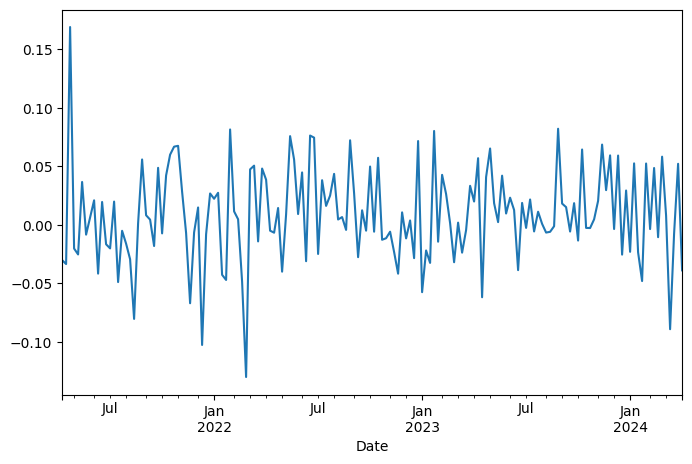

In [ ]:
tvs_df[f'Return_{ticker}'].plot(figsize=(8,5))
plt.show()

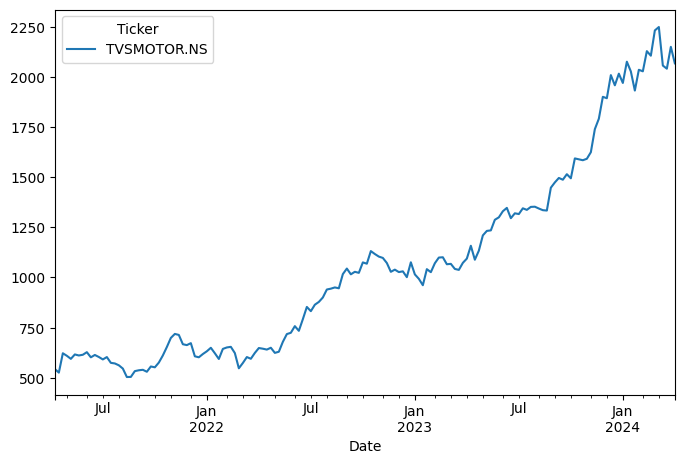

In [ ]:
tvs_df['Adj Close'].plot(figsize=(8,5))
plt.show()

In [ ]:
tvs_df1_returns = tvs_df[f'Return_{ticker}']
tvs_df1_returns.head()

,Return_TVSMOTOR.NS
Date,
2021-04-12 00:00:00+00:00,-0.030296
2021-04-19 00:00:00+00:00,-0.033679
2021-04-26 00:00:00+00:00,0.169001
2021-05-03 00:00:00+00:00,-0.020416
2021-05-10 00:00:00+00:00,-0.025478


In [ ]:
nifty_df1_returns = nifty_df1['Return_NIFTY']
nifty_df1_returns.head()

,Return_NIFTY
Date,
2021-04-12 00:00:00+00:00,-0.014736
2021-04-19 00:00:00+00:00,-0.019096
2021-04-26 00:00:00+00:00,0.020002
2021-05-03 00:00:00+00:00,0.013041
2021-05-10 00:00:00+00:00,-0.009854


In [ ]:
returns = pd.merge(nifty_df1_returns,tvs_df1_returns,how='inner',on='Date')
returns.head()
returns.describe()

,Return_NIFTY,Return_TVSMOTOR.NS
count,156.000000,156.000000
mean,0.002674,0.008384
std,0.018186,0.040490
min,-0.057694,-0.130293
25%,-0.009293,-0.014386
50%,0.005121,0.004576
75%,0.015187,0.036873
max,0.040914,0.169001


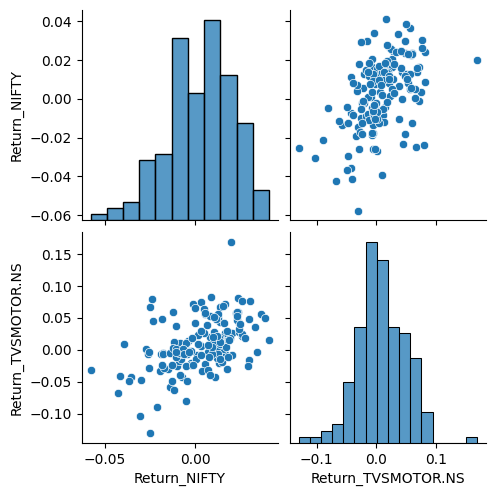

In [ ]:
sns.pairplot(returns)
plt.show()

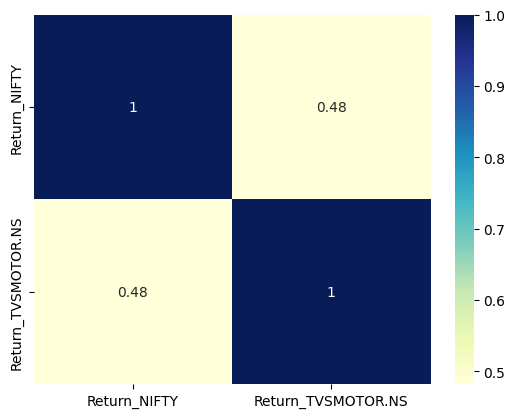

In [ ]:
sns.heatmap(returns.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
x = returns['Return_NIFTY']
y = returns[f'Return_{ticker}']
x_sm = sm.add_constant(x)

In [ ]:
#Regression - Market model(beta)
model = sm.OLS(y,x_sm)
results = model.fit()

In [ ]:
#Regression result
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Return_TVSMOTOR.NS   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     46.59
Date:                Sun, 17 Nov 2024   Prob (F-statistic):           1.89e-10
Time:                        02:14:19   Log-Likelihood:                 300.01
No. Observations:                 156   AIC:                            -596.0
Df Residuals:                     154   BIC:                            -589.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0055      0.003      1.915      0.057      -0.000       0.011
Return_NIFTY     1.0730      0.157      6.826      0.000       0.762       1.384
==============================================================================
Omnibus:                       12.958   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               20.618
Skew:                           0.431   Prob(JB):                     3.33e-05
Kurtosis:                       4.559   Cond. No.                         55.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#beta
beta = results.params[1]
beta

1.07302089818186

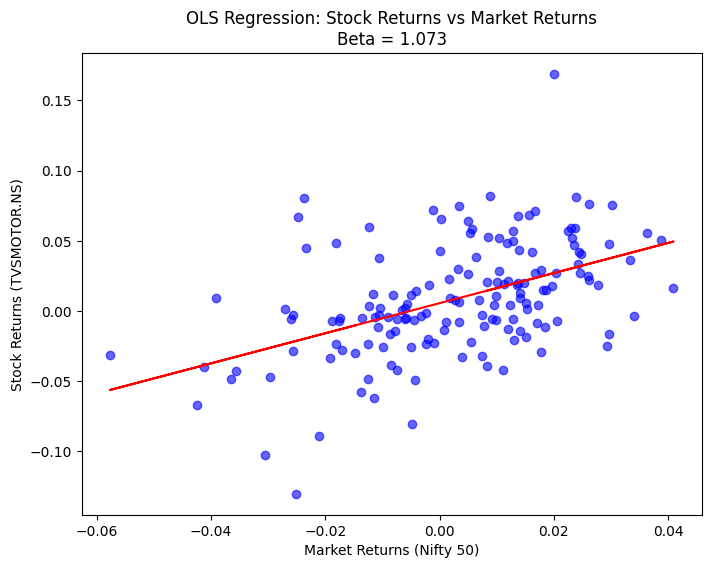

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label="Data Points", color='blue', alpha=0.6)
plt.plot(x, results.fittedvalues, label="OLS Regression Line", color='red')
plt.xlabel('Market Returns (Nifty 50)')
plt.ylabel(f'Stock Returns ({ticker})')
plt.title(f'OLS Regression: Stock Returns vs Market Returns\nBeta = {beta.round(4)}')
plt.show()

In [ ]:
#calculating cost of equity
expected_market_return = nifty_df1_returns.mean()*52
risk_free_rate = 0.07
def calculate_cost_of_equity(beta, risk_free_rate, expected_market_return):
  return risk_free_rate + (beta * (expected_market_return - risk_free_rate))
cost_of_equity = calculate_cost_of_equity(beta, risk_free_rate, expected_market_return)
cost_of_equity

0.14409025527942548

In [ ]:
print(f'Cost Of Equity: {round(cost_of_equity,4)}')

Cost Of Equity: 0.1441


CALCULATING COST OF DEBT

In [ ]:
#Calculating EBIT/Interest expense
ebit = income_statement['EBIT']
interest_expense = income_statement['Interest Expense']
interest_coverage_ratio = ebit / interest_expense
print(f'EBIT/Interest Ratio: {interest_coverage_ratio.values[-1]}')

EBIT/Interest Ratio: 2.4102461090559992


CREDT SPREAD = 3.5%

In [ ]:
#calculating cost of debt
credit_spread = 0.035
def calculate_cost_of_debt(risk_free_rate, credit_spread):
    return risk_free_rate + credit_spread

cost_of_debt = calculate_cost_of_debt(risk_free_rate, credit_spread)
cost_of_debt

0.10500000000000001

In [ ]:
'Cash Financial' in balance_sheet.T.index

True

In [ ]:
enterprise_value = stock.info.get('enterpriseValue', None)
total_debt = balance_sheet['Total Debt'].sum()
cash = balance_sheet['Cash Financial'].sum() if 'Cash Financial' in balance_sheet.T.index else 0
print(cash)
years_to_maturity = 5
#to calculate market value of debt
def calculate_market_value_of_debt(interest_expense, total_debt, years_to_maturity):
  market_value_of_debt = (interest_expense * (1 - (1 / (1 + cost_of_debt)**years_to_maturity)) / cost_of_debt) \
                           + (total_debt / (1 + cost_of_debt)**years_to_maturity)

  return market_value_of_debt

market_value_of_debt = calculate_market_value_of_debt(interest_expense, total_debt, years_to_maturity)
market_value_of_debt[-1]


54026700000.0


461482205014.8915

In [ ]:
#to calculate market value of equity
def calculate_market_value_of_equity(enterprise_value, market_value_debt, cash):
    market_value_equity = enterprise_value - market_value_debt + cash
    return market_value_equity

market_value_equity = calculate_market_value_of_equity(enterprise_value, market_value_of_debt, cash)
market_value_equity[-1]

968321164681.1085

In [ ]:
de_ratio = market_value_of_debt/market_value_equity
de_ratio[-1]

0.4765796946789536

In [ ]:
#calculating wacc
weight_equity = 1/ (1 + de_ratio)
weight_debt = de_ratio / (1 + de_ratio)
wacc = (weight_equity * cost_of_equity) + (weight_debt * cost_of_debt * (1 - tax_rate))
wacc[-1]

0.12300108615192772

In [ ]:
cashflow_statement

,Free Cash Flow,Issuance Of Debt,Capital Expenditure,End Cash Position,Beginning Cash Position,Changes In Cash,Financing Cash Flow,Net Other Financing Charges,Interest Paid Cff,Cash Dividends Paid,...,Change In Receivables,Other Non Cash Items,Provisionand Write Offof Assets,Depreciation And Amortization,Amortization Cash Flow,Depreciation,Gain Loss On Investment Securities,Net Foreign Currency Exchange Gain Loss,Gain Loss On Sale Of PPE,Net Income From Continuing Operations
2020-03-31,NaN,5126900000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-31,2233100000.0,NaN,-9279800000.0,15737600000.0,10413400000.0,5324200000.0,2635000000.0,-552100000.0,-1267500000.0,-997700000.0,...,-13019500000.0,1191700000.0,265600000.0,5648200000.0,NaN,5648200000.0,-2400000.0,177000000.0,19600000.0,8216300000.0
2022-03-31,-25450200000.0,33533400000.0,-9698300000.0,14456800000.0,15737600000.0,-1280800000.0,29180200000.0,-72400000.0,-1557400000.0,-1904000000.0,...,-30021700000.0,1499300000.0,-254900000.0,7428600000.0,NaN,7428600000.0,-40400000.0,-56500000.0,-24700000.0,10667900000.0
2023-03-31,-57455800000.0,65876800000.0,-13407700000.0,18511900000.0,14456800000.0,4055100000.0,61180800000.0,622700000.0,-1120800000.0,-2918100000.0,...,-66260400000.0,1886100000.0,157400000.0,8588600000.0,1977200000.0,6611400000.0,-1074200000.0,6300000.0,-26500000.0,19360300000.0
2024-03-31,-23978400000.0,NaN,-11451700000.0,23558000000.0,18511900000.0,5046100000.0,27586400000.0,-439600000.0,-2836700000.0,-3800700000.0,...,-55152300000.0,2472300000.0,614000000.0,9751200000.0,2217200000.0,7534000000.0,-631900000.0,108200000.0,-33800000.0,27029200000.0


In [ ]:
balance_sheet.T.index

Index(['Treasury Shares Number', 'Ordinary Shares Number', 'Share Issued',
       'Net Debt', 'Total Debt', 'Tangible Book Value', 'Invested Capital',
       'Working Capital', 'Net Tangible Assets', 'Capital Lease Obligations',
       'Common Stock Equity', 'Total Capitalization',
       'Total Equity Gross Minority Interest', 'Minority Interest',
       'Stockholders Equity', 'Other Equity Interest', 'Retained Earnings',
       'Capital Stock', 'Common Stock',
       'Total Liabilities Net Minority Interest',
       'Total Non Current Liabilities Net Minority Interest',
       'Other Non Current Liabilities',
       'Non Current Deferred Taxes Liabilities',
       'Long Term Debt And Capital Lease Obligation',
       'Long Term Capital Lease Obligation', 'Long Term Debt',
       'Long Term Provisions', 'Current Liabilities',
       'Other Current Liabilities',
       'Current Debt And Capital Lease Obligation',
       'Current Capital Lease Obligation', 'Current Debt',
       'Pensio

In [ ]:
income_statement

,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,...,Depreciation And Amortization In Income Statement,Amortization,Depreciation Income Statement,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
2022-03-31,-1.178278e+08,0.314879,2.729880e+10,-3.742000e+08,-3.742000e+08,7.568200e+09,7.428600e+09,1.631699e+11,2.692460e+10,1.949600e+10,...,7.428600e+09,1.147100e+09,6.281500e+09,1.115890e+10,1.076820e+10,390700000.0,5.003800e+10,1.631699e+11,2.132079e+11,2.132079e+11
2023-03-31,3.501100e+08,0.323637,4.042560e+10,1.081800e+09,1.081800e+09,1.328670e+10,8.588600e+09,2.090566e+11,4.150740e+10,3.291880e+10,...,8.588600e+09,1.977200e+09,6.611400e+09,1.336070e+10,1.293700e+10,423700000.0,6.528020e+10,2.090566e+11,2.743368e+11,2.743368e+11
2024-03-31,2.254419e+08,0.341993,5.528750e+10,6.592000e+08,6.592000e+08,1.686370e+10,9.751200e+09,2.446460e+11,5.594670e+10,4.619550e+10,...,9.751200e+09,2.217200e+09,7.534000e+09,1.811110e+10,1.758520e+10,525900000.0,8.569780e+10,2.446460e+11,3.303438e+11,3.303438e+11


In [ ]:
def calculate_terminal_value_growth_rate(income_statement, balance_sheet, cashflow_statement,equity):

    net_income = income_statement['Net Income'].iloc[-1]
    # equity = balance_sheet['Total Assets'].iloc[-1] - balance_sheet['Total Liabilities Net Minority Interest'].iloc[-1]
    retained_earnings = balance_sheet['Retained Earnings'].iloc[-1]
    dividends_paid = cashflow_statement['Cash Dividends Paid'].iloc[-1]

    reinvestment_rate = (net_income - dividends_paid) / net_income if net_income != 0 else 0

    roe = net_income / equity if equity != 0 else 0

    growth_rate = reinvestment_rate * roe
    return growth_rate


In [ ]:
growth_rate = calculate_terminal_value_growth_rate(income_statement, balance_sheet, cashflow_statement,market_value_equity[-1])
print(f"Growth rate = {growth_rate}")

Growth rate = 0.02134044029369665


In [ ]:
cost_of_equity

0.14409025527942548

In [ ]:
#calculating value of the firm through DCF valuation
def calculate_dcf_fcfe(fcfe_values, cost_of_equity, growth_rate):
    years = len(fcfe_values)

    present_value_fcfe = sum(fcfe / ((1 + cost_of_equity) ** (i + 1)) for i, fcfe in enumerate(fcfe_values))

    terminal_value = fcfe_values[-1] * (1 + growth_rate) / (cost_of_equity - growth_rate)
    present_value_terminal_value = terminal_value / ((1 + cost_of_equity) ** years)

    firm_value = present_value_fcfe + present_value_terminal_value

    return firm_value

In [ ]:
fcfe_values = projection_df["FCFE"].values
firm_value = calculate_dcf_fcfe(fcfe_values, cost_of_equity, growth_rate)
print(f'Firm Value : {firm_value}')

Firm Value : 642079038117.6334


In [ ]:
#getting data of comparable companies
tickers = ["M&M.NS", "HEROMOTOCO.NS", "ASHOKLEY.NS", "TVSMOTOR.NS"]
data = {}
for ticker in tickers:
    stocks = yf.Ticker(ticker)
    info = stocks.info

    data[ticker] = {
        "Market Cap": info.get("marketCap"),
        "Enterprise Value": info.get("enterpriseValue"),
        "PE Ratio": info.get("trailingPE"),
        "Revenue": info.get("totalRevenue"),
        "EBITDA": info.get("ebitda"),
        "Earnings Growth": info.get("earningsQuarterlyGrowth"),  # Earnings growth
    }

df = pd.DataFrame(data).T
print("Financial Data for Companies:\n")
df

Financial Data for Companies:



,Market Cap,Enterprise Value,PE Ratio,Revenue,EBITDA,Earnings Growth
M&M.NS,3.364963e+12,4.133996e+12,27.777557,1.474165e+12,2.681668e+11,0.351
HEROMOTOCO.NS,9.208000e+11,8.781172e+11,22.573053,3.914840e+11,5.404225e+10,0.473
ASHOKLEY.NS,6.391140e+11,1.057477e+12,24.336690,4.653164e+11,8.484190e+10,0.341
TVSMOTOR.NS,1.137539e+12,1.375777e+12,60.235043,4.200220e+11,5.850050e+10,0.451


In [ ]:
#industry averages
industry_df = df.drop("TVSMOTOR.NS")
industry_pe = industry_df["PE Ratio"].mean()
industry_ev_ebitda = (industry_df["Enterprise Value"] / industry_df["EBITDA"]).mean()
industry_ps = (industry_df["Market Cap"] / industry_df["Revenue"]).mean()
industry_peg = (industry_df["PE Ratio"] / industry_df["Earnings Growth"]).mean()

print("\nIndustry Averages:")
print("P/E Ratio:", industry_pe)
print("EV/EBITDA Ratio:", industry_ev_ebitda)
print("P/S Ratio:", industry_ps)
print("PEG Ratio:", industry_peg)


Industry Averages:
P/E Ratio: 24.89576666666667
EV/EBITDA Ratio: 14.709523868198616
P/S Ratio: 2.002734221242739
PEG Ratio: 66.07669595163618


In [ ]:
tvs_valuation_pe = industry_pe * df.loc["TVSMOTOR.NS", "Revenue"] / df.loc["TVSMOTOR.NS", "Revenue"]
tvs_valuation_ev_ebitda = industry_ev_ebitda * df.loc["TVSMOTOR.NS", "EBITDA"]
tvs_valuation_ps = industry_ps * df.loc["TVSMOTOR.NS", "Revenue"]

print("\nTVS Motors Valuation Using Industry Multiples:")
print("Equity Value using P/E Ratio:", tvs_valuation_pe)
print("Enterprise Value using EV/EBITDA Ratio:", tvs_valuation_ev_ebitda)
print("Market Cap using P/S Ratio:", tvs_valuation_ps)


TVS Motors Valuation Using Industry Multiples:
Equity Value using P/E Ratio: 24.89576666666667
Enterprise Value using EV/EBITDA Ratio: 860514523174.677
Market Cap using P/S Ratio: 841192420000.9688


In [ ]:
#growth rate through relative valuation method
tvs_growth_rate = industry_peg * df.loc["TVSMOTOR.NS", "Earnings Growth"]
print("\nEstimated Growth Rate for TVS Motors using PEG Ratio:", tvs_growth_rate)


Estimated Growth Rate for TVS Motors using PEG Ratio: 29.80058987418792
